<a href="https://colab.research.google.com/github/Dzukito/Data-Science-Kaggle/blob/main/Segmentaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Contexto**
Una empresa de automóviles tiene planes de ingresar a nuevos mercados con sus productos existentes. Después de una intensa investigación de mercado, han deducido que el comportamiento del nuevo mercado es similar al del mercado existente.

En su mercado actual, el equipo de ventas ha clasificado a todos los clientes en 4 segmentos **(A, B, C, D)**. Luego, realizaron un alcance y comunicación segmentados para un segmento diferente de clientes. Esta estrategia les ha funcionado excepcionalmente bien. Planean utilizar la misma estrategia para los nuevos mercados y han identificado 2627 nuevos clientes potenciales.

Debe ayudar al gerente a predecir el grupo correcto de nuevos clientes. 




In [374]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings("ignore")

In [375]:
data= pd.read_csv("Train.csv")
data_test=pd.read_csv("Test.csv")
df= data.copy()
df_test=data_test.copy()

dfmaster=pd.concat([df,df_test], axis=0)
dfmaster.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [376]:
dfmaster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10695 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     10695 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1002.7+ KB


In [377]:
dfmaster.shape

(10695, 11)

 **Contamos con 10.695 datos totales y 10 columnas.**
Entre ellas, 7 categóricas:
*   Género del cliente
*   Estado civil del cliente
*   Graduado (Nivel de estudios del cliente)
*   Profesión del cliente
*   Puntuación de gasto del cliente
*   Var_1: Categoría anonimizada para el cliente
*   **Segmentacion (target)**

Y 4 numéricas:

*   ID
*   Edad del cliente
*   Experiencia laboral (años) del cliente
*   Tamaño de la familia del cliente (incluyendo al cliente)



  







# Valores nulos

In [378]:
#Hay valores nulos?
dfmaster.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation          0
dtype: int64

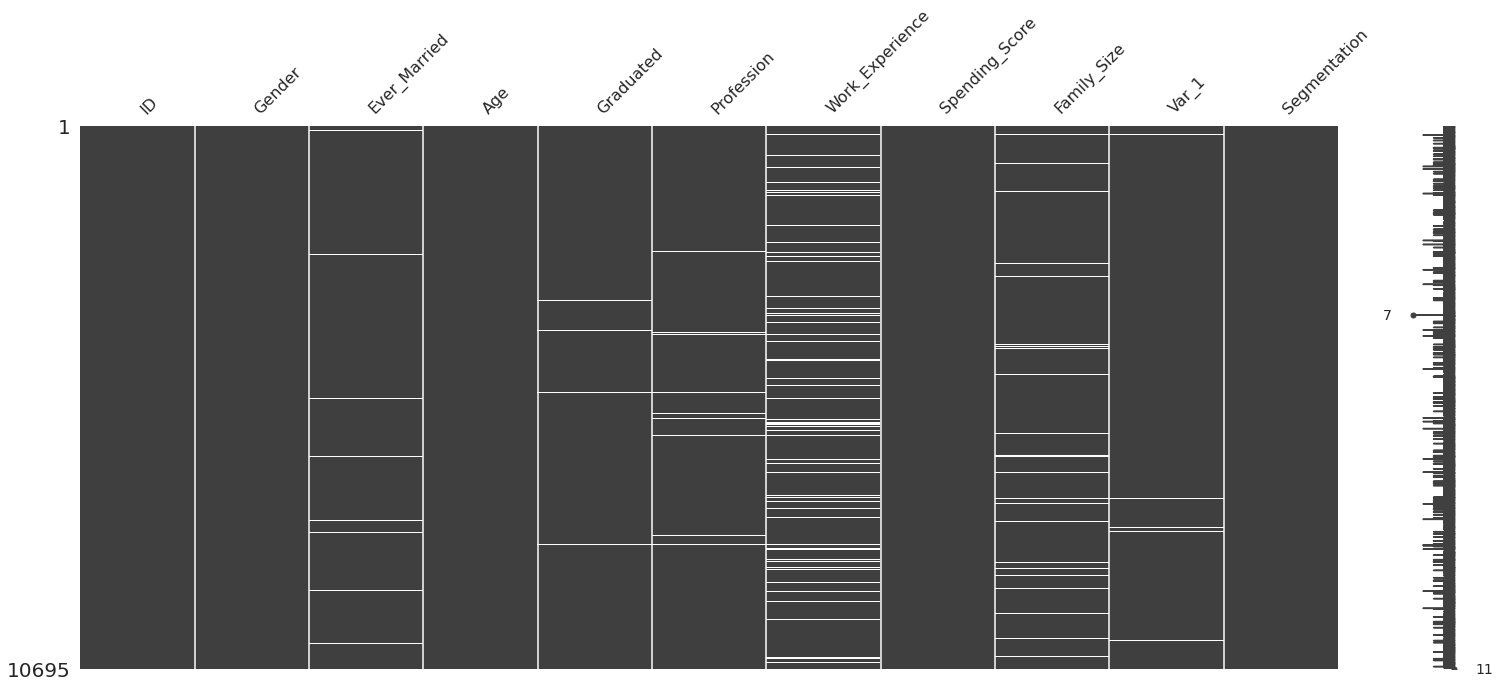

In [379]:
msno.matrix(dfmaster)

In [380]:
#Hay duplicados?
dfmaster.duplicated().sum()

38

**Hay bastantes datos faltantes sobre el estado civil de los clientes, si están graduados, cual es su profesion, su experiencia laboral (demasiados), el tamaño de su familia y la variable anonima. Hay que tratar dichos valores a continuacion y a su vez, eliminar los duplicados**

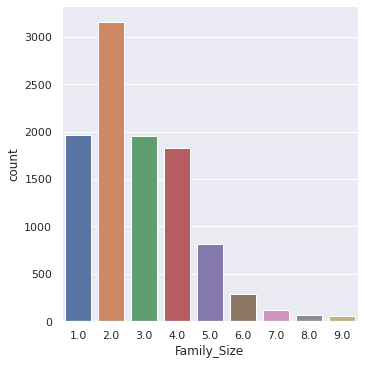

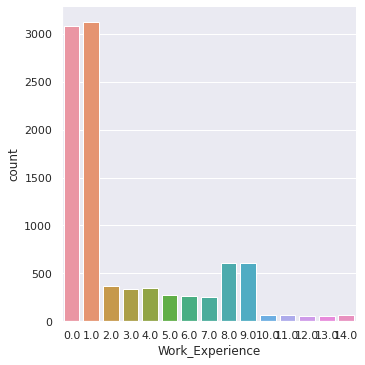

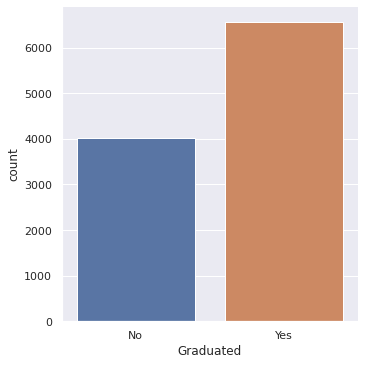

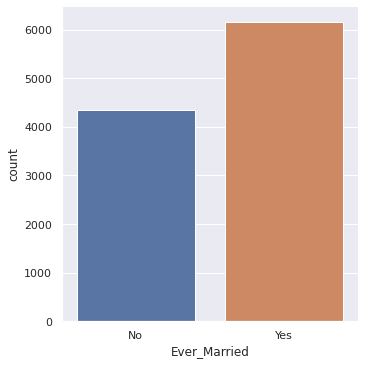

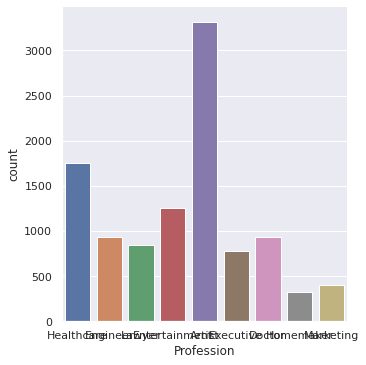

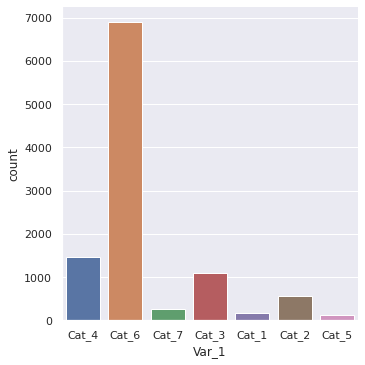

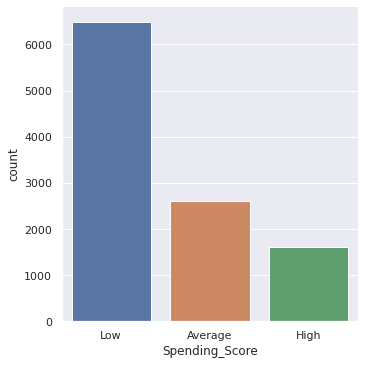

In [381]:
sns.catplot(x="Family_Size",kind="count",data=dfmaster)
sns.catplot(x="Work_Experience",kind="count",data=dfmaster)
sns.catplot(x="Graduated",kind="count",data=dfmaster)
sns.catplot(x="Ever_Married",kind="count",data=dfmaster)
sns.catplot(x="Profession",kind="count",data=dfmaster)
sns.catplot(x="Var_1",kind="count",data=dfmaster)
sns.catplot(x="Spending_Score",kind="count",data=dfmaster)

**Elimino los duplicados**


In [382]:
dfmaster.drop_duplicates(inplace=True)

**Tratamiento de valores perdidos:**
*   Eliminamos la columna Work_Experience, pues si se busca su correlación con Segmentation no tiene mucha relevancia para una potencial predicción.
*   Completo los valores de Ever_Married y Graduated con "No"
*   Para Var_1 y Profession eliminar las filas con nulos
*   Family_Size imputar con media


In [383]:
dfmaster.drop(["Work_Experience"],axis=1, inplace=True)
dfmaster["Ever_Married"].fillna("No", inplace=True)
dfmaster["Graduated"].fillna("No", inplace=True)
dfmaster.dropna(subset=["Profession"], inplace=True)
dfmaster["Family_Size"].fillna(dfmaster["Family_Size"].mean(), inplace=True)
dfmaster.dropna(subset=["Var_1"], inplace=True)

In [384]:
dfmaster.isnull().sum()

ID                0
Gender            0
Ever_Married      0
Age               0
Graduated         0
Profession        0
Spending_Score    0
Family_Size       0
Var_1             0
Segmentation      0
dtype: int64

# Outliers

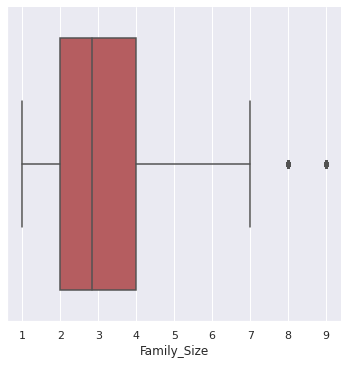

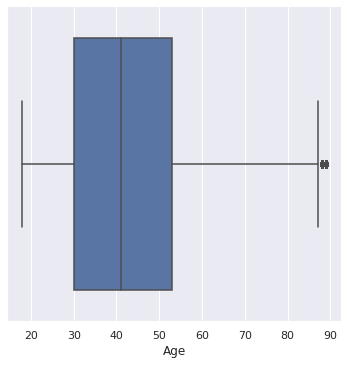

In [385]:
sns.catplot(x="Family_Size",kind="box",data=dfmaster, color='r')
sns.catplot(x="Age",kind="box",data=dfmaster)

In [386]:
dfmaster= dfmaster[(dfmaster.Age<=84)]
dfmaster= dfmaster[(dfmaster.Family_Size<=7)]

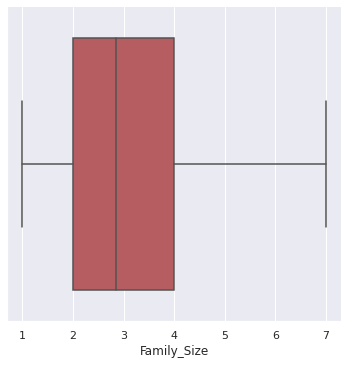

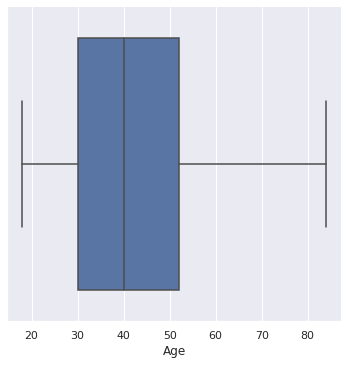

In [387]:
sns.catplot(x="Family_Size",kind="box",data=dfmaster, color='r')
sns.catplot(x="Age",kind="box",data=dfmaster)

# Encoding

One Hot Encoding para Genero, Casado y Graduado. Label Encoding para todo lo demas.

In [388]:
dfclean= dfmaster.copy()

In [389]:
#Genero
gendummy=pd.get_dummies(dfclean.Gender)
dfclean = pd.concat([dfclean, gendummy], axis=1)
dfclean.drop(["Gender"],axis=1, inplace=True)

In [390]:
#Casado
mardummy=pd.get_dummies(dfclean.Ever_Married,prefix="Married")
dfclean = pd.concat([dfclean, mardummy], axis=1)
dfclean.drop(["Ever_Married"],axis=1, inplace=True)

In [391]:
#Graduado
gradummy=pd.get_dummies(dfclean.Graduated,prefix="Graduated")
dfclean = pd.concat([dfclean, gradummy], axis=1)
dfclean.drop(["Graduated"],axis=1, inplace=True)

In [392]:
#Spending Score
spedummy=pd.get_dummies(dfclean.Spending_Score,prefix="Spending_Score")
dfclean = pd.concat([dfclean, spedummy], axis=1)
dfclean.drop(["Spending_Score"],axis=1, inplace=True)

In [393]:
#Profession, Spending_Score, Var_1 y Segmentation
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
dfclean['Profession'] = labelencoder.fit_transform(dfclean['Profession'])
dfclean['Var_1'] = labelencoder.fit_transform(dfclean['Var_1'])
dfclean['Segmentation'] = labelencoder.fit_transform(dfclean['Segmentation'])

In [394]:
dfclean.head()

,ID,Age,Profession,Family_Size,Var_1,Segmentation,Female,Male,Married_No,Married_Yes,Graduated_No,Graduated_Yes,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
0,462809,22,5,4.0,3,3,0,1,1,0,1,0,0,0,1
1,462643,38,2,3.0,3,0,1,0,0,1,0,1,1,0,0
2,466315,67,2,1.0,5,1,1,0,0,1,0,1,0,0,1
3,461735,67,7,2.0,5,1,0,1,0,1,0,1,0,1,0
4,462669,40,3,6.0,5,0,1,0,0,1,0,1,0,1,0


In [395]:
'''def decodificar(datos):
  gendummy=pd.get_dummies(datos.Gender)
  datos = pd.concat([datos, gendummy], axis=1)
  datos.drop(["Gender"],axis=1, inplace=True)

  mardummy=pd.get_dummies(datos.Ever_Married,prefix="Married").astype(int)
  datos = pd.concat([datos, mardummy], axis=1)
  datos.drop(["Ever_Married"],axis=1, inplace=True)

  gradummy=pd.get_dummies(datos.Graduated,prefix="Graduated").astype(int)
  datos = pd.concat([datos, gradummy], axis=1)
  datos.drop(["Graduated"],axis=1, inplace=True)

  from sklearn.preprocessing import LabelEncoder
  labelencoder=LabelEncoder()
  datos['Profession'] = labelencoder.fit_transform(datos['Profession']).astype(int)
  datos['Var_1'] = labelencoder.fit_transform(datos['Var_1']).astype(int)
  datos['Segmentation'] = labelencoder.fit_transform(datos['Segmentation']).astype(int)
  datos['Spending_Score'] = labelencoder.fit_transform(datos['Spending_Score']).astype(int)


  return datos'''

'def decodificar(datos):\n  gendummy=pd.get_dummies(datos.Gender)\n  datos = pd.concat([datos, gendummy], axis=1)\n  datos.drop(["Gender"],axis=1, inplace=True)\n\n  mardummy=pd.get_dummies(datos.Ever_Married,prefix="Married").astype(int)\n  datos = pd.concat([datos, mardummy], axis=1)\n  datos.drop(["Ever_Married"],axis=1, inplace=True)\n\n  gradummy=pd.get_dummies(datos.Graduated,prefix="Graduated").astype(int)\n  datos = pd.concat([datos, gradummy], axis=1)\n  datos.drop(["Graduated"],axis=1, inplace=True)\n\n  from sklearn.preprocessing import LabelEncoder\n  labelencoder=LabelEncoder()\n  datos[\'Profession\'] = labelencoder.fit_transform(datos[\'Profession\']).astype(int)\n  datos[\'Var_1\'] = labelencoder.fit_transform(datos[\'Var_1\']).astype(int)\n  datos[\'Segmentation\'] = labelencoder.fit_transform(datos[\'Segmentation\']).astype(int)\n  datos[\'Spending_Score\'] = labelencoder.fit_transform(datos[\'Spending_Score\']).astype(int)\n\n\n  return datos'

# Describe y Correlación

In [396]:
dfclean.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10061.0,463477.515158,2596.052578,458982.0,461242.0,463452.000000,465734.0,467974.0
Age,10061.0,42.778352,15.741373,18.0,30.0,40.000000,52.0,84.0
Profession,10061.0,2.725375,2.514376,0.0,0.0,2.000000,5.0,8.0
Family_Size,10061.0,2.797400,1.383755,1.0,2.0,2.845259,4.0,7.0
Var_1,10061.0,4.132989,1.427926,0.0,3.0,5.000000,5.0,6.0
Segmentation,10061.0,1.528675,1.155374,0.0,0.0,2.000000,3.0,3.0
Female,10061.0,0.451844,0.497700,0.0,0.0,0.000000,1.0,1.0
Male,10061.0,0.548156,0.497700,0.0,0.0,1.000000,1.0,1.0
Married_No,10061.0,0.427592,0.494754,0.0,0.0,0.000000,1.0,1.0
Married_Yes,10061.0,0.572408,0.494754,0.0,0.0,1.000000,1.0,1.0



1.   La edad se encuentra entre los 18 y 89 años, con un promedio de 43 y el 75% de los clientes no supera los 53
2.   La mitad de clientes tiene 1 año de experiencia laboral
3. El promedio de tamaño familiar es de 2 personas




In [397]:
dfclean.corr()["Segmentation"]

ID                       -0.006753
Age                      -0.200801
Profession                0.184150
Family_Size               0.149078
Var_1                    -0.010807
Segmentation              1.000000
Female                   -0.017867
Male                      0.017867
Married_No                0.173312
Married_Yes              -0.173312
Graduated_No              0.142452
Graduated_Yes            -0.142452
Spending_Score_Average   -0.059354
Spending_Score_High      -0.053707
Spending_Score_Low        0.091129
Name: Segmentation, dtype: float64

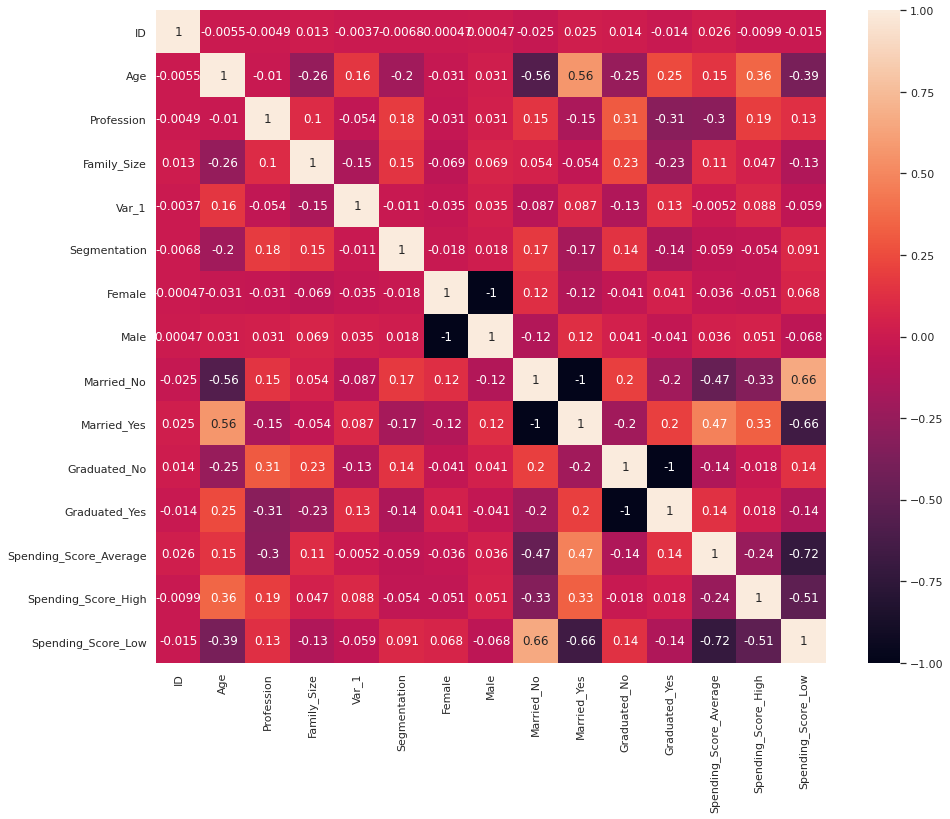

In [398]:
sns.set(rc={'figure.figsize':(15,12)})
sns.heatmap(dfclean.corr(),annot=True)

**Observaciones:**
*   No parece haber una relación fuerte entre las variables y nuestro target
*   Aun asì, la Edad, el ***estado civil*** y la ***profesion*** afectan MUY levemente la segmentacion
*   Edad y estar casado tienen una relación notoria, asi como estar casado y el gasto del cliente
* Var_1 y el puntaje de gasto no parecen aportar valor a la prediccion





# EDA

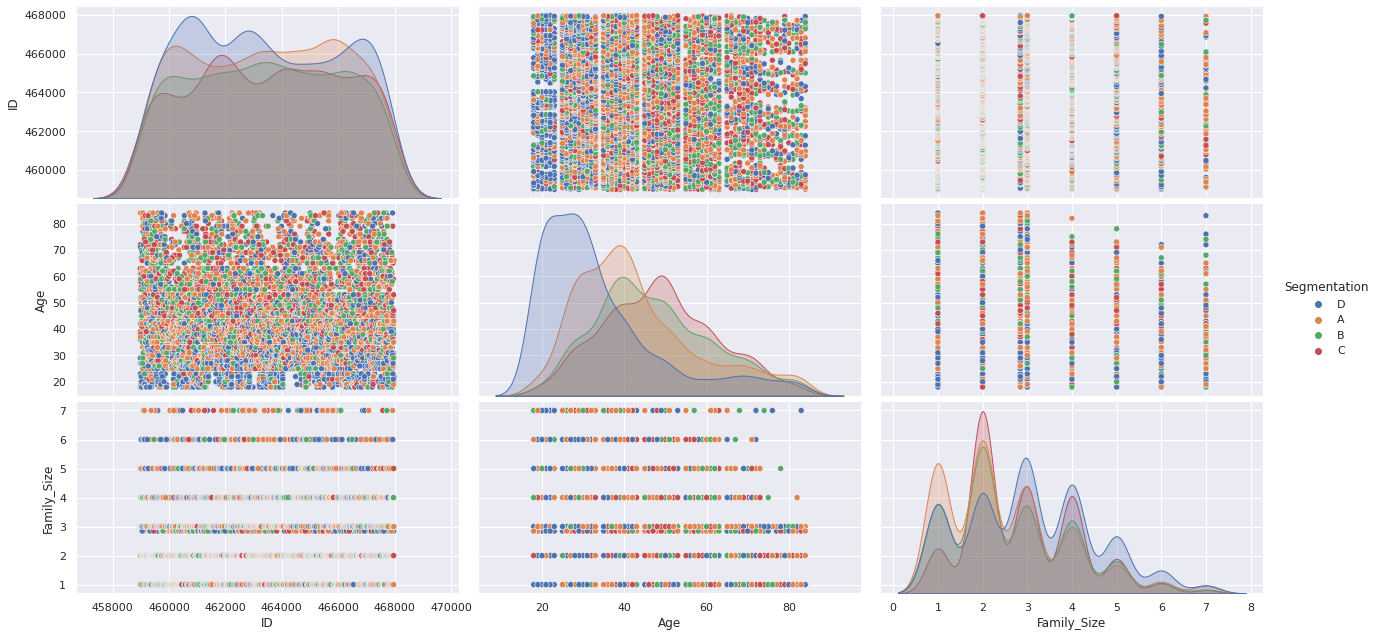

In [399]:
sns.set(rc={'figure.figsize':(15,12)})
sns.pairplot(dfmaster, hue="Segmentation", height=3,aspect=2)

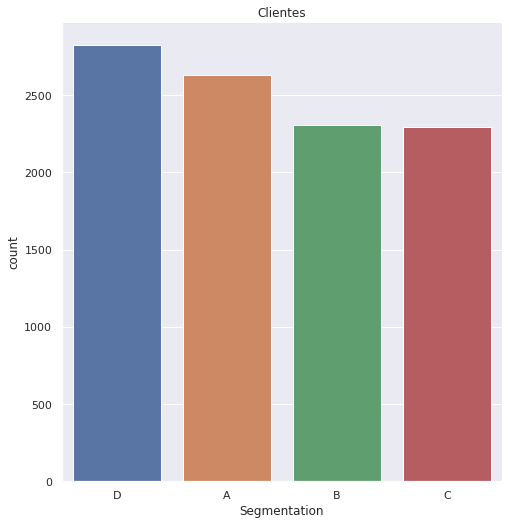

In [400]:
sns.catplot(x="Segmentation",data=dfmaster,kind="count",height=7).set(title='Clientes')

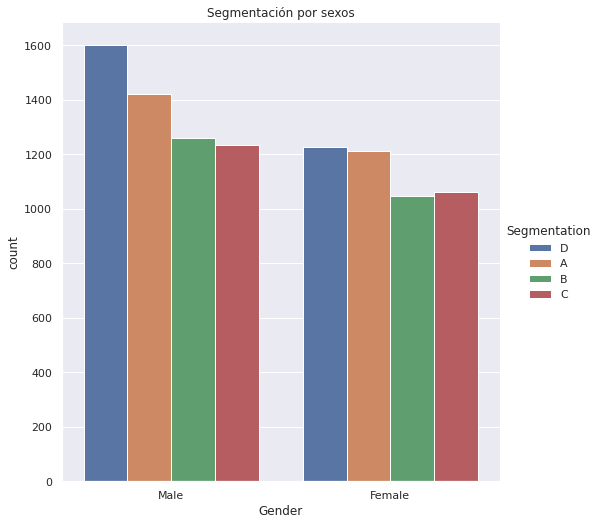

In [401]:
sns.catplot(x="Gender",hue="Segmentation",data=dfmaster,kind="count",height=7).set(title='Segmentación por sexos')

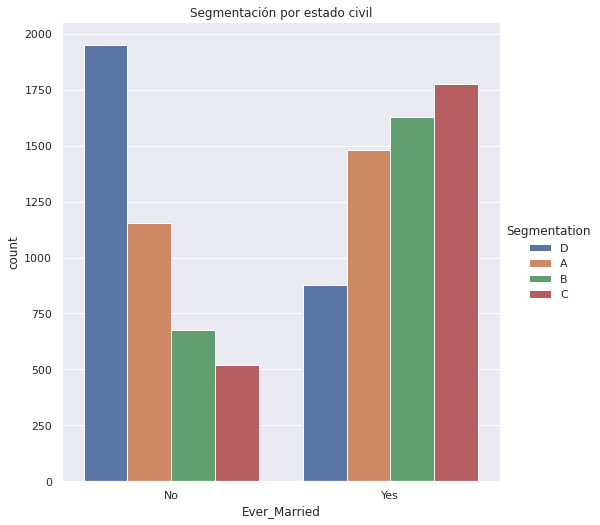

In [402]:
sns.catplot(x="Ever_Married",hue="Segmentation",data=dfmaster,kind="count",height=7).set(title='Segmentación por estado civil')

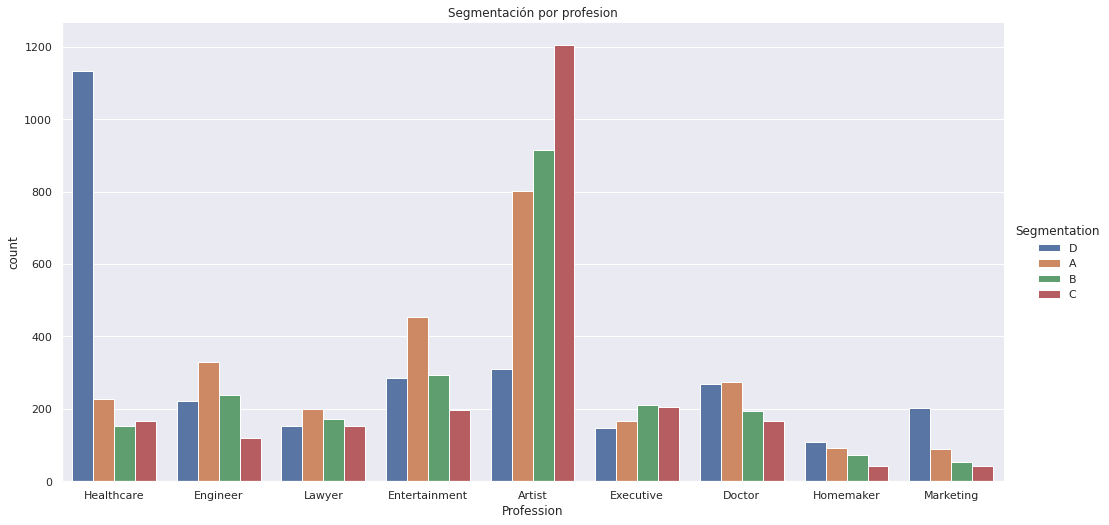

In [403]:
sns.catplot(x="Profession",hue="Segmentation",data=dfmaster,kind="count",height=7,aspect=2).set(title='Segmentación por profesion')

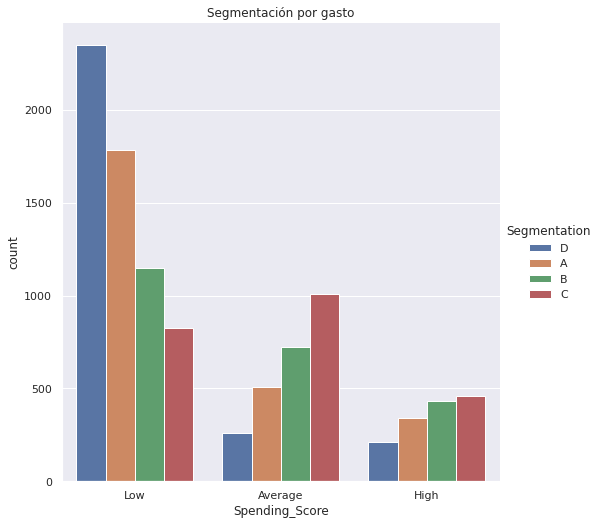

In [404]:
sns.catplot(x="Spending_Score",hue="Segmentation",data=dfmaster,kind="count",height=7).set(title='Segmentación por gasto')

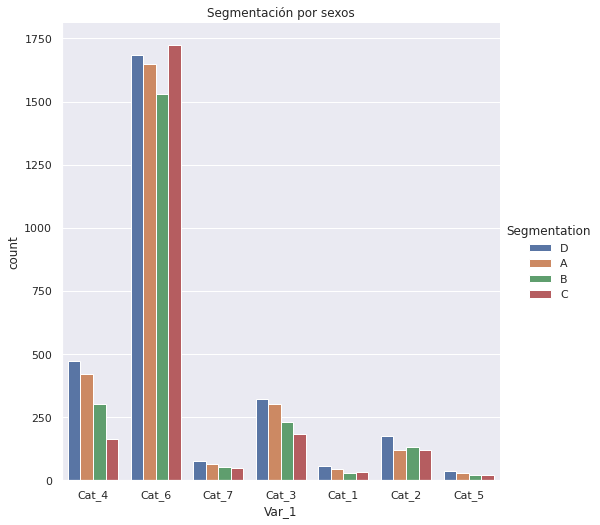

In [405]:
sns.catplot(x="Var_1",hue="Segmentation",data=dfmaster,kind="count",height=7).set(title='Segmentación por sexos')

# Modelado

In [406]:
from sklearn.model_selection import train_test_split

seed=121

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier


lr = LogisticRegression(n_jobs = -1)
svc = SVC() 
knn = KNeighborsClassifier(n_jobs= -1)
rf = RandomForestClassifier(n_jobs = -1, random_state = seed)
xgb = XGBClassifier(n_jobs = -1, random_state = seed)
gb=GradientBoostingClassifier()
abc=AdaBoostClassifier()


In [407]:
X= dfclean.drop(["ID","Segmentation", "Var_1"],axis=1)
Y= dfclean.Segmentation
X.head()

,Age,Profession,Family_Size,Female,Male,Married_No,Married_Yes,Graduated_No,Graduated_Yes,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
0,22,5,4.0,0,1,1,0,1,0,0,0,1
1,38,2,3.0,1,0,0,1,0,1,1,0,0
2,67,2,1.0,1,0,0,1,0,1,0,0,1
3,67,7,2.0,0,1,0,1,0,1,0,1,0
4,40,3,6.0,1,0,0,1,0,1,0,1,0


In [408]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [409]:
#Por defecto el metodo score retorna el coeficiente de determinacion R^2
def entrenar(model):
    model.fit(X_train, y_train)
    return (model.score(X_train, y_train),model.score(X_test, y_test))
    #return model.score(X_test, y_test)

#Entrenamos
modelos = {'LogisticRegression': lr,
          'KNeighborsClassifier': knn,
          'SVC': svc,
          'RandomForestClassifier': rf,
          'XGBClassifier': xgb,
          'GradientBoostingClassifier': gb,
          'AdaBoostClassifier': abc}
scores={}
train_scores={}
for nombre, modelo in modelos.items():
    scores[nombre]=entrenar(modelo)[1]
    train_scores[nombre]=entrenar(modelo)[0]

scores.items()

dict_items([('LogisticRegression', 0.4793840039741679), ('KNeighborsClassifier', 0.41828117237953305), ('SVC', 0.45156482861400893), ('RandomForestClassifier', 0.41033283656234476), ('XGBClassifier', 0.49279682066567315), ('GradientBoostingClassifier', 0.5027322404371585), ('AdaBoostClassifier', 0.48335817188276203)])

In [410]:
scores = pd.DataFrame(scores,index=['Score']).transpose()
scores = scores.sort_values('Score')

train_scores = pd.DataFrame(train_scores,index=['Train Score']).transpose()
train_scores = train_scores.sort_values('Train Score')

In [411]:
cm = sns.color_palette('flare',as_cmap=True)
scores = scores.style.background_gradient(cmap=cm)
scores


,Score
RandomForestClassifier,0.410333
KNeighborsClassifier,0.418281
SVC,0.451565
LogisticRegression,0.479384
AdaBoostClassifier,0.483358
XGBClassifier,0.492797
GradientBoostingClassifier,0.502732


In [412]:
train_scores.style.background_gradient(cmap=cm)

,Train Score
SVC,0.443091
LogisticRegression,0.458250
AdaBoostClassifier,0.484592
XGBClassifier,0.513171
GradientBoostingClassifier,0.523733
KNeighborsClassifier,0.588345
RandomForestClassifier,0.788022


In [413]:
#Ojo con el sobreajuste del Bosque aleatorio!

# Conclusión

Para ayudar al negocio a adoptar las mejores estrategias de marketing para cada uno de sus clientes aplicando segmentación, abordamos el proceso desde la definición del objetivo comercial, la recopilación de datos, exploración, comprensión de correlaciones, el procesamiento y la selección de características relevantes, el modelado y la implementacion de algoritmos de machine learning.


---


El modelo elegido fue XGBoost por ser el más preciso, aunque no presenta una gran precisión al igual que el resto.
Podríamos llegar a un modelo más robusto si conseguimos más datos sobre los clientes,  es algo para tener en cuenta en la organización con el equipo de negocios y el ingeniero de datos para explorar si hay características más relevantes disponibles.